# Introduction

This EDA (Exploratory Data Analysis) aims to analyze the dataset (descriptive analysis) and to prove hypothesis based on main questions (estimation and inference).

For performing the analysis, the data is first transformed and then the outliers are cleaned.

# Import Libraries 

In [1]:
# Importing required libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Loading of Dataset

In [2]:
# Loading dataset and drop unneeded labels

Diets_Dataset = pd.read_csv('./Diets_Dataset.csv')
Diets_Dataset.drop(columns=['Extraction_day','Extraction_time'],inplace=True)

In [3]:
# Example of records

Diets_Dataset.head(10)

,Diet_type,Recipe_name,Cuisine_type,Protein(g),Carbs(g),Fat(g)
0,paleo,Bone Broth From 'Nom Nom Paleo',american,5.22,1.29,3.20
1,paleo,"Paleo Effect Asian-Glazed Pork Sides, A Sweet ...",south east asian,181.55,28.62,146.14
2,paleo,Paleo Pumpkin Pie,american,30.91,302.59,96.76
3,paleo,Strawberry Guacamole recipes,mexican,9.62,75.78,59.89
4,paleo,"Asian Cauliflower Fried ""Rice"" From 'Nom Nom P...",chinese,39.84,54.08,71.55
5,paleo,Paleo Shrimp-Stuffed Mushrooms recipes,mediterranean,68.62,34.15,42.44
6,paleo,Paleo Pumpkin Pie recipes,american,30.03,275.88,97.68
7,paleo,Autoimmune Paleo Pesto,italian,4.25,14.15,72.90
8,paleo,Baked Banana Chip Encrusted French Toast,french,152.88,1874.52,385.80
9,paleo,Vietnamese Pho Pressure Cooker (Noodle Soup),south east asian,602.91,274.87,400.01


In [4]:
# Naming main variables

Macronutrients = ['Carbs(g)','Protein(g)','Fat(g)']
Diets = ['dash', 'keto', 'mediterranean', 'paleo', 'vegan']

# Transformation of Macronutrient Values

For comparing the nutritional values (macronutrients) between the different types of diets, each macronutrient value was rescaled to its proportional contribution from the total macronutrients in each recipe.

This transformation will make it possible to analyze and compare the presence of each macronutrient in the different diets.

In [5]:
# Creating labels for total macronutrients supply

Diets_Dataset['Total_Macronutrients'] = Diets_Dataset[Macronutrients].apply(sum,axis=1)

In [6]:
# Transforming each macronutrient value into its proportional contribution

for macronutrient in Macronutrients:
    Diets_Dataset[macronutrient] /= Diets_Dataset['Total_Macronutrients']

# Analysis of Statistics by Type of Diet

For each type of diet, an analysis of the statistics obtained is presented in the context of what the specific diet means [[1]](#references). 

A general analysis is not performed because the different recipes, since they belong to a specific diet, are supposed to be sufficiently heterogeneous to treat them all similarly.

## DASH

A recipe of this diet will have that, using the average, 55% of its macronutrients are carbohydrates that come from fruits, vegetables and whole grains; 25% are fats, which by their nature, are beneficial for the human body; and 20% are proteins, which come from margarine meats. 

Although it is said to be a healthy diet (for cardiovascular health) it does not imply a balance or equilibrium of the macronutrients consumed in a dish or portion. This is reflected in the percentages cited above.

Fifty percent of the recipes have between 33% and 76% of carbohydrates in their composition, which can also be observed in the standard deviation of this macronutrient. This implies that carbohydrates can be in any proportion and still be a recipe of this diet and, due to its interquartile range, this macronutrient has the highest presence.

This phenomenon does not appear for proteins and fats, both their respective standard deviation and interquartile range reflect how these macronutrients are concentrated in a smaller range of values. Specifically, 50% of the recipes have between 7% and 28% protein and between 10% and 37% fat.

This could mean that the recipes are not as varied in their macronutrient contributions, contradicting that it is a healthy (or balanced) diet, noting that it is a diet rich in carbohydrates. This does not exclude that by consuming several recipes a balance is achieved.

In [7]:
Diets_Dataset.query("Diet_type == 'dash'").describe()

,Protein(g),Carbs(g),Fat(g),Total_Macronutrients
count,1745.000000,1745.000000,1745.000000,1745.000000
mean,0.196241,0.549425,0.254334,330.968590
std,0.162871,0.278850,0.194078,337.469679
min,0.000000,0.001526,0.000000,0.060000
25%,0.068931,0.331143,0.103381,89.690000
50%,0.156626,0.555219,0.234742,239.870000
75%,0.282629,0.757917,0.371292,467.930000
max,0.833467,1.000000,0.973404,3450.250000


## Keto

A recipe of this diet will have, on average, 50% of its macronutrients are fats, this is related to the fact that it is intended to induce ketosis (the principle on which the keto diet is based), so a high value would be expected; 30% of its macronutrients are proteins, again, as it is intended to reduce the intake of carbohydrates, a high intake of proteins would be expected as compensation; and 20% are carbohydrates, highlighting that it is a low-carbohydrate diet.

Fifty percent of the recipes have between 40% and 60% fat in their composition, denoting a high-fat diet and that a large part of their recipes have a high concentration of fats (which are considered healthy). And 50% of the recipes also verify that they have between 8% and 26% carbohydrates in their composition, again verifying the fact that they want to induce ketosis by minimizing carbohydrate intake.

For proteins, it is in an intermediate case, where it is a macronutrient that is distributed in a wide range of values, this when using the interquartile range, noting that it is a macronutrient that compensates for the low consumption of carbohydrates and the distribution of fats.

Since all three macronutrients report a similar standard deviation, this would indicate that the recipes, in their macronutrient composition, are very similar to each other. That is, most recipes, regardless of their ingredients, will provide, in relative terms, the same amounts of macronutrients. This results in a high variety of recipes that generate the same nutritional contributions.

In [8]:
Diets_Dataset.query("Diet_type == 'keto'").describe()

,Protein(g),Carbs(g),Fat(g),Total_Macronutrients
count,1512.000000,1512.000000,1512.000000,1512.000000
mean,0.301777,0.200879,0.497344,312.353439
std,0.167027,0.160609,0.166572,219.541253
min,0.000000,0.002060,0.000000,4.840000
25%,0.158284,0.085517,0.405354,153.172500
50%,0.302900,0.157348,0.505751,266.475000
75%,0.409453,0.267535,0.591887,417.735000
max,0.856868,1.000000,0.997940,1977.980000


## Mediterranean

A recipe of this diet will have that, using the average, 42% of its macronutrients are carbohydrates, this due to the high consumption of products such as fruits, vegetables, whole grains; 30% of its macronutrients are fats, highlighting the high consumption of nuts and olive oil, as well as a moderate consumption of fish; and 28% of its macronutrients are proteins, this is related to a moderate consumption of poultry and fish, and a low consumption of red meat.

Fifty percent of the recipes have between 25% and 60% carbohydrates in their composition, reflecting a high variety of macronutrient compositions in the recipes. Showing that it is not restricted by a carbohydrate quota, but quite the opposite.

This phenomenon of variety in the recipes can also be observed, to a lesser extent, in the protein and lipid composition. Denoting a high range in the possible recipes and their compositions, specifically, fifty percent have between 18% and 39% of lipids and between 16% and 38% of proteins in their macronutrient composition.

The wide variety in recipe compositions could be an indication of an internationalization of Mediterranean recipes, which means taking inspiration from the recipes used in the geographical region and adapting them to the products of other regions (this is exactly where this variety in nutritional compositions arises from).

In [9]:
Diets_Dataset.query("Diet_type == 'mediterranean'").describe()

,Protein(g),Carbs(g),Fat(g),Total_Macronutrients
count,1753.000000,1753.000000,1753.000000,1753.000000
mean,0.279357,0.424493,0.296150,355.433999
std,0.162853,0.214325,0.160783,270.643360
min,0.005036,0.006733,0.001731,3.970000
25%,0.159633,0.249955,0.180357,180.200000
50%,0.227883,0.439382,0.268336,303.680000
75%,0.377820,0.607531,0.390404,467.260000
max,0.887557,0.992746,0.968722,4367.600000


## Paleo

A recipe of this diet will have that, on average, 38% of its macronutrients are fats and 37% are carbohydrates, this is related to the consumption of products such as fruits, vegetables, nuts and seeds, foods that can be found in the wild; and 25% of its macronutrients are proteins that come from foods such as margarine meats and fish.

Fifty percent of the recipes have between 19% and 51% of carbohydrates in their composition, an indicator that they have a high variety of recipes due to the fact that they are oriented to the consumption of wild foods and more in their natural state. 

Because the protein and fat composition have a similar standard deviation, it reflects, in part, that the foods associated with these macronutrients do not have a high diversity. In other words, the same foods of these macronutrients can be found in the recipes.

The possible limitation of foods associated with proteins and fats could have an impact on the fact that foods are made up of the same products within the same geographic region. This would be related to a low variety in the macronutrient composition of the recipes.

In [10]:
Diets_Dataset.query("Diet_type == 'paleo'").describe()

,Protein(g),Carbs(g),Fat(g),Total_Macronutrients
count,1274.000000,1274.000000,1274.000000,1274.000000
mean,0.249693,0.371307,0.379000,353.895918
std,0.175031,0.221506,0.175471,289.180595
min,0.000000,0.003612,0.001404,8.410000
25%,0.102963,0.192399,0.256579,172.650000
50%,0.205532,0.351300,0.382447,299.000000
75%,0.375392,0.515054,0.488116,460.677500
max,0.858503,0.987368,0.968835,3323.400000


## Vegan

A recipe of this diet, on average, 60% of the macronutrients are carbohydrates, these come from foods such as vegetables, fruits, cereals and legumes; 25% of macronutrients are fats, this is related to the consumption of nuts and seeds; and 15% of macronutrients are proteins, this is related to the fact that animal products are not consumed and are replaced by vegetable products rich in protein.

Fifty percent of the recipes have between 50% and 71% of carbohydrates in their composition, reflecting that the recipes have a high consumption of carbohydrates originating from vegetable products, which, because of their diversity, reflects the variety of vegetables, fruits, cereals and legumes. And because their standard deviation is similar to that of fats, fifty percent of the recipes have a similar composition, in terms of carbohydrates and fats.

As indicated by the protein standard deviation, most of the recipes have a low protein composition, or are concentrated in a low composition, this is related to the restriction of animal food consumption or lack of protein-related foods.

The latter is an indication that the recipes have an insufficiency of protein, but have more varied compositions for carbohydrates and fats, in general, they are similar in these compositions.

In [11]:
Diets_Dataset.query("Diet_type == 'vegan'").describe()

,Protein(g),Carbs(g),Fat(g),Total_Macronutrients
count,1522.000000,1522.000000,1522.000000,1522.000000
mean,0.148489,0.593968,0.257543,413.460900
std,0.086088,0.171203,0.160277,315.720858
min,0.001921,0.000330,0.000112,2.290000
25%,0.085339,0.504070,0.142575,203.740000
50%,0.139688,0.626246,0.231518,340.310000
75%,0.190381,0.714679,0.344529,542.227500
max,0.647416,0.986872,0.994887,3271.070000


# Plotting of Macronutrients by Type of Diet

Including outliers, these plots show what the macronutrient distributions are like by diet type. Showing that each diet has different distributions.

Also, a high concentration of outliers can be observed, so it is necessary to treat them to obtain more meaningful results.

From the plots and using [[1]](#references), the following is obtained:

**DASH**

From the histograms, it can be seen that there is a positive or rightward skew in the proportions of proteins and fats; this implies that there are recipes with low contributions of these macronutrients and that the recipes with a high contribution are not considered part of this diet, statistically, this is reflected as the outliers in the respective boxplots. The former reflects a possible imbalance in nutritional intake, contradicting the characteristic of being a healthy diet for cardiovascular health.

**Keto**

From the histogram, the proportion of carbohydrates is skewed to the right, reinforcing the fact that it is a low-carbohydrate diet and that, from the boxplot, there are recipes that are outside this frame because they have a high contribution of this macronutrient, in other words, the outliers. In the proportion of fats, it is observed that it is no skewed, or that its bias is desperciable, being understood that this macronutrient has recipes with a high contribution of fats as well as with a low or null contribution; this implies the presence of recipes that are not framed as part of this diet if only their nutritional contributions are observed.

**Mediterranean**

From the histogram, the proportion of protein is skewed to the right and in addition to a high accumulation of recipes with low protein intake, this reinforces the idea that it is a diet with low consumption of protein-rich foods, while recipes with high protein intake are considered outliers, statistically, according to the boxplot. From the boxplot, there are recipes with high contributions of fats, statistically, this is considered so because the foods rich in fats are consumed in a moderate way, this is reflected in its histogram; besides that the foods that are consumed more are like fruits, vegetables and whole grains, foods richer in carbohydrates showing how the recipes are concentrated in more moderate contributions, but not high.

**Paleo**

From the boxplots, it can be observed how the recipes tend to have moderate contributions of carbohydrates and fats, this is related to the fact that the foods with greater availability in nature are fruits, vegetables, seeds, nuts and grains that become the basis of this recipe. But, for the same reason, there are no foods with high protein intake in nature other than animals, this makes the recipes concentrate on low protein intake, which is what is observed in its histogram.

**Vegan**

From the histogram, a high concentration of recipes with low protein intake is highlighted, this is related to the fact that foods rich in protein, mostly of animal origin, are not allowed to be consumed in this diet, and, from the boxplot, seeing a recipe that has a high protein intake becomes atypical. And due to high consumption of non-animal foods, which are mostly of vegetable origin, it makes the recipes have high carbohydrate intake, which is seen in the histogram; therefore, if a recipe has a low carbohydrate intake it would be atypical, statistically.

## Plotting Functions

In [ ]:
# Function for plotting of macronutrients by diet on Histogram

def PlotMacronutientsByDiet(Diet:str):
    diet_type_dataset = Diets_Dataset.query("Diet_type == @Diet")
    def PlotMacronutients():
        Display = "PPCC\n.FF."
        fig , axes = plt.subplot_mosaic(Display,figsize=(12,8),layout='tight')
    
        ConfigPlot = zip(Macronutrients,['C','P','F'],['green','red','yellow'])
        for macronutrient , display , color in ConfigPlot:
            sns.histplot(data=diet_type_dataset,x=macronutrient,ax=axes[display],stat='proportion',bins=50,color=color)
            axes[display].set_title(macronutrient[:-3])
            axes[display].set_xlabel('Grams')
    
        fig.suptitle(f'Diet: {Diet}',size=25)

    PlotMacronutients()

In [ ]:
# Function for plotting macronutrients by diet on Boxplot

def PlotMacronutrients():
    Display = "PPCC\n.FF."
    fig , axes = plt.subplot_mosaic(Display,figsize=(12,8),layout='tight')
        
    ConfigPlot = zip(Macronutrients,['C','P','F'],['green','red','yellow'])
    for macronutrient , display , color in ConfigPlot:
        sns.boxplot(data=Diets_Dataset,x=macronutrient,y='Diet_type',ax=axes[display],color=color)
        axes[display].set_title(macronutrient[:-3])
        axes[display].set_xlabel('Grams')
    
    fig.suptitle('Distribution of Macronutrients by Diet',size=25)

## Plotting of Macronutrients

### Histograms

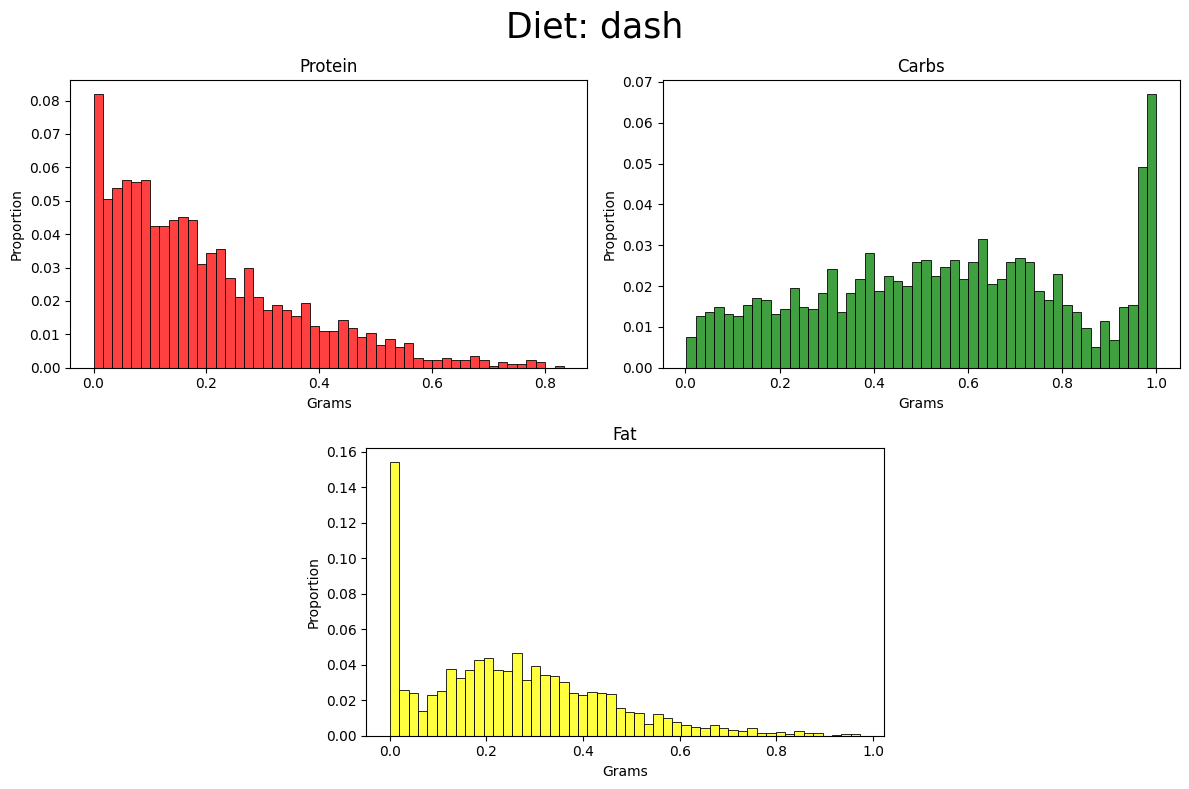

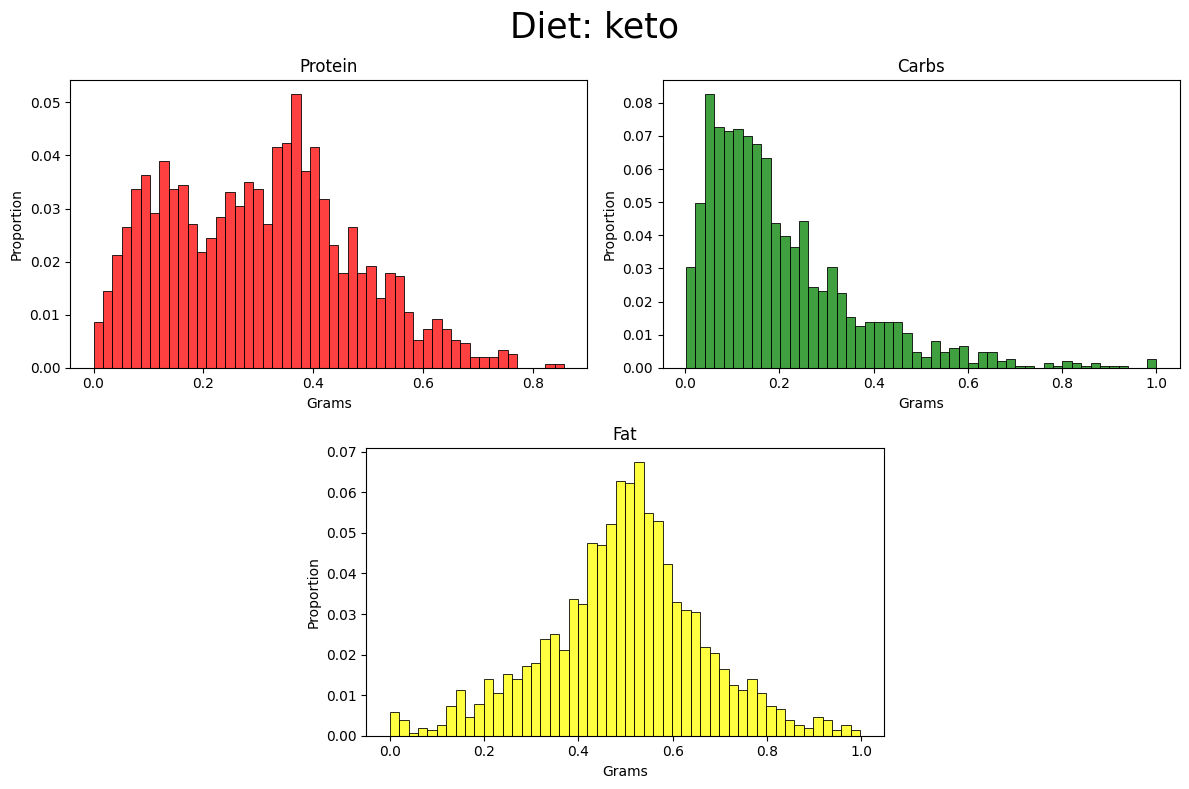

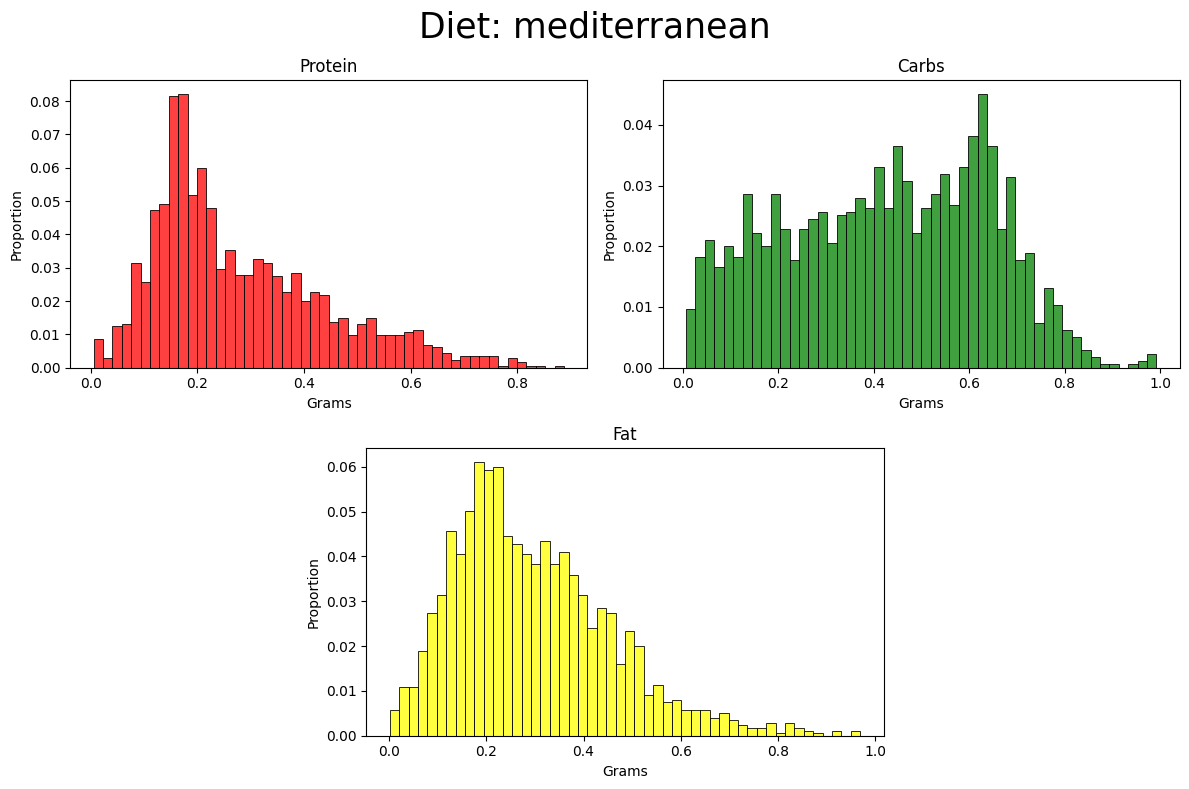

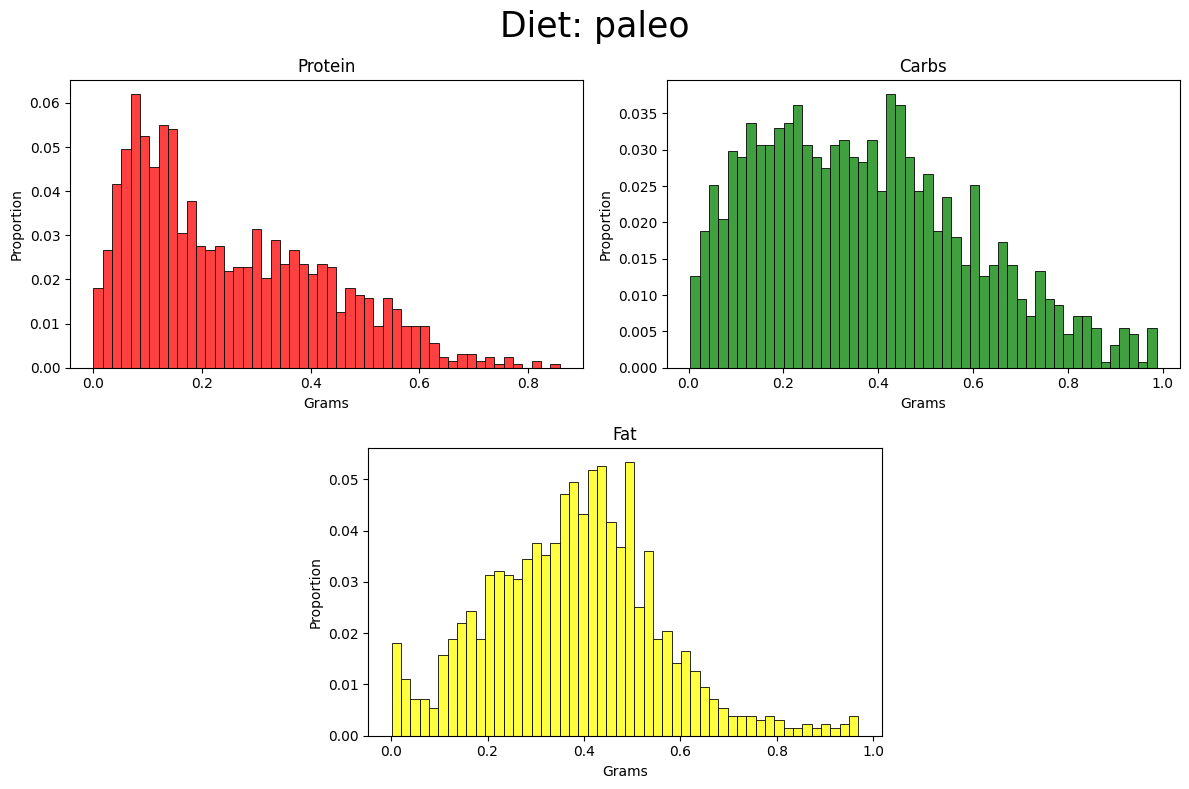

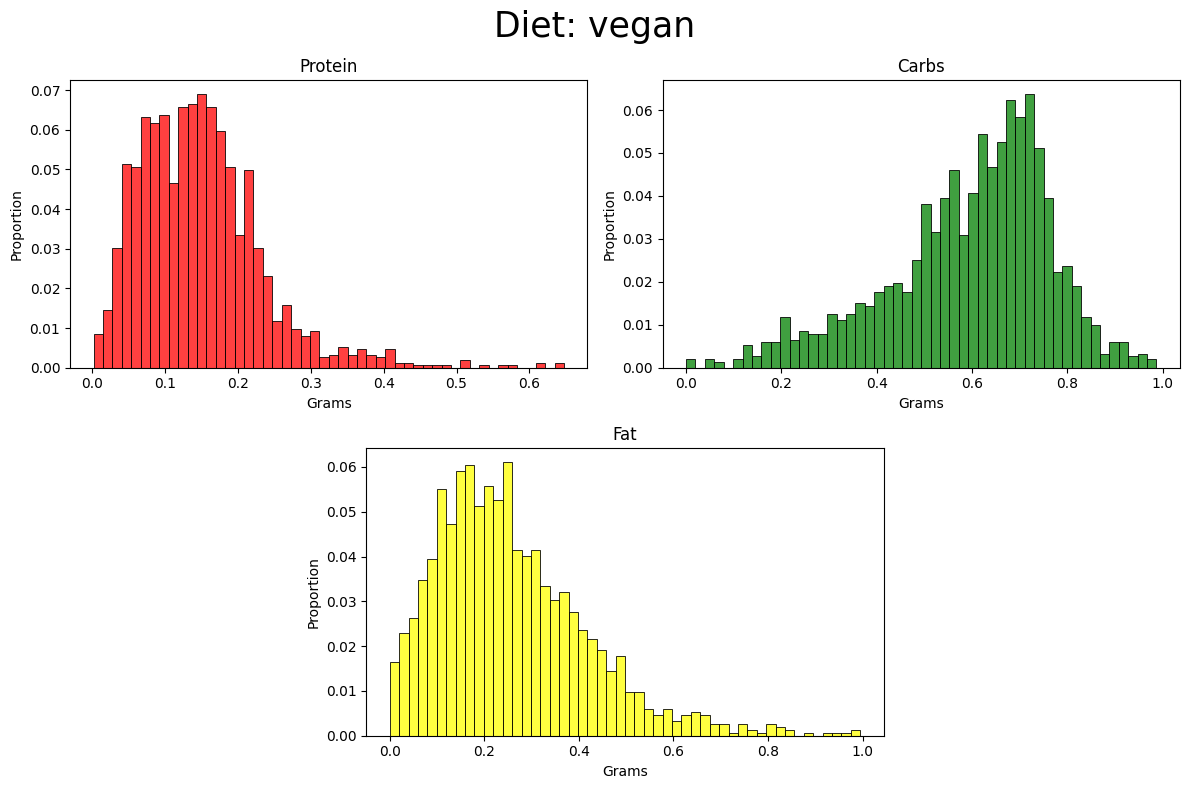

In [14]:
# Plotting of macronutrient values by type of diet

for diet in Diets:
    PlotMacronutientsByDiet(diet)

### Boxplots

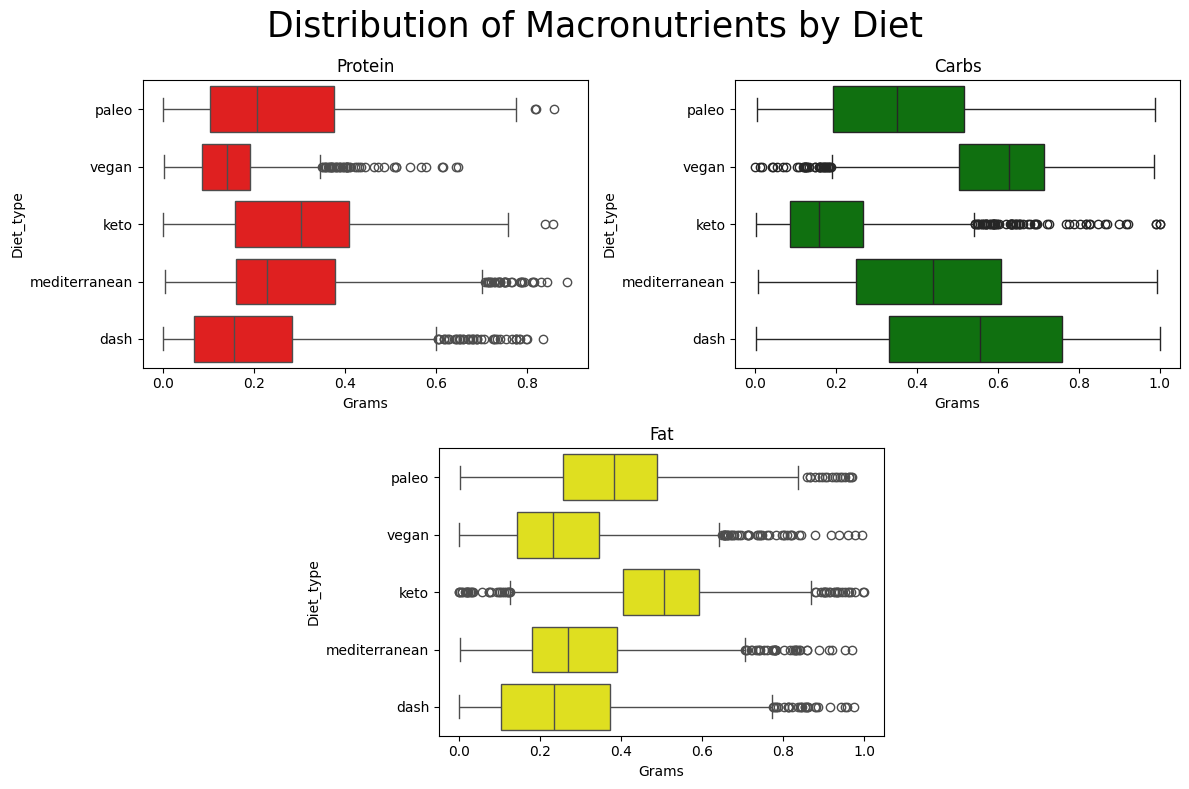

In [15]:
# Plotting of macronutrient values

PlotMacronutrients()

# Correlation Matrix

From the correlation matrices and using [[1]](#references), the following is obtained:
* DASH : 

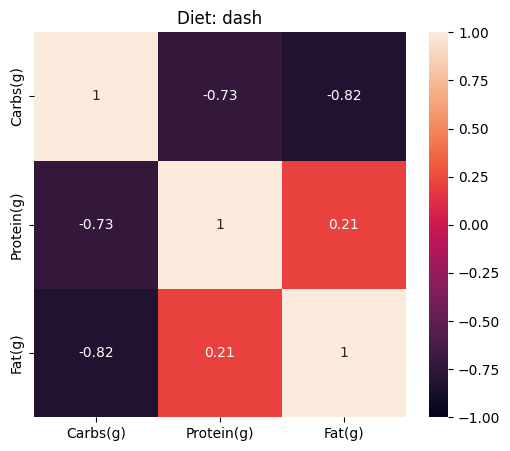

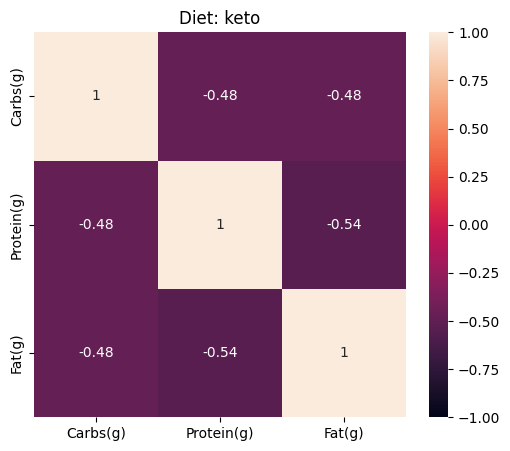

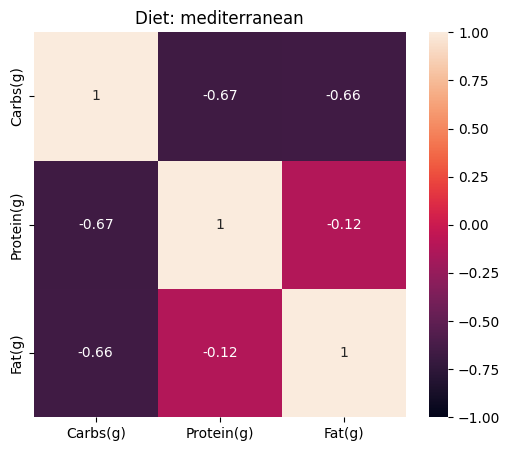

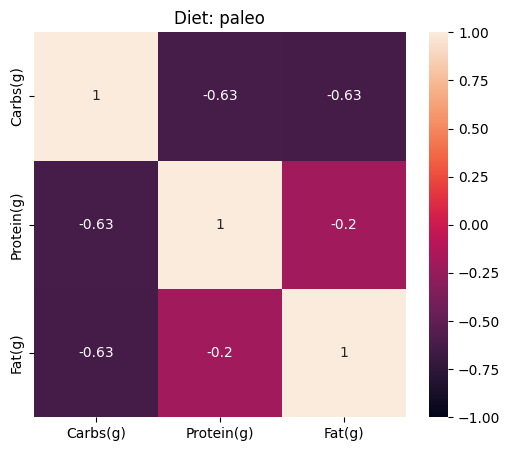

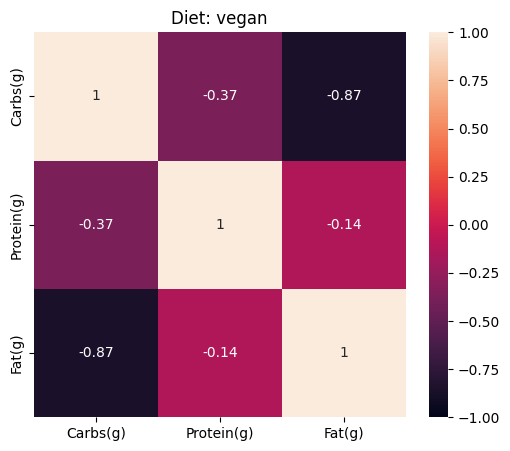

In [16]:
# Plotting correlation matrix

for index_plot , diet in enumerate(Diets):
    fig , axes = plt.subplots(figsize=(6,5))
    sns.heatmap(Diets_Dataset.query("Diet_type == @diet")[Macronutrients].corr(),annot=True,vmin=-1,vmax=1,ax=axes)
    axes.set_title(f"Diet: {diet}")

# Plotting of Macronutrients on 2D Projection

Each point represents a recipe. If it approaches the origin $(0,0)$, it is high in carbohydrates; if it approaches the point $(1,0)$, it is high in protein; and if it approaches the point $(1/2,\sqrt{3}/2)$, it is high in fat.

## Plotting Functions

In [93]:
# Function for plotting Macronutrients on a plane 

def PlotMacronutrients2D(Diet:str):
    fig , axes = plt.subplots(figsize=(7,5.5),layout='tight')
    
    data_macronutrients = Diets_Dataset.query("Diet_type == @Diet")[Macronutrients].to_numpy().T
    matrix_transformation = np.linalg.inv(np.array([[-1,-np.sqrt(3)/3,1],[1,-np.sqrt(3)/3,0],[0,2*np.sqrt(3)/3,0]]))
    data_transformed = (matrix_transformation@data_macronutrients).T

    mean_macronutrients = data_macronutrients.mean(axis=1)
    mean_transformed = matrix_transformation@mean_macronutrients

    sns.scatterplot(x=data_transformed[:,0],y=data_transformed[:,1],ax=axes)
    sns.scatterplot(x=[mean_transformed[0]],y=[mean_transformed[1]],color='red')

    delta = 0.01
    axes.set_xlim(0-delta,1+delta)
    axes.set_ylim(0-delta,np.sqrt(3)/2+delta)

    fig.suptitle(f'Diet: {Diet}',size=25)

## Plotting of Macronutrients

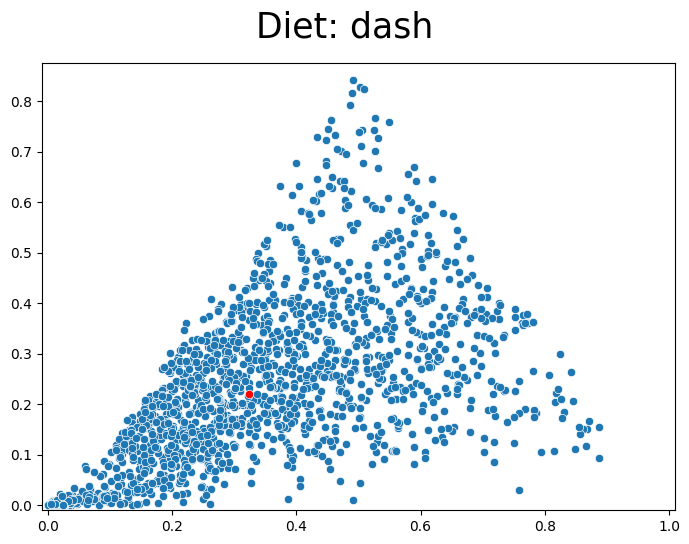

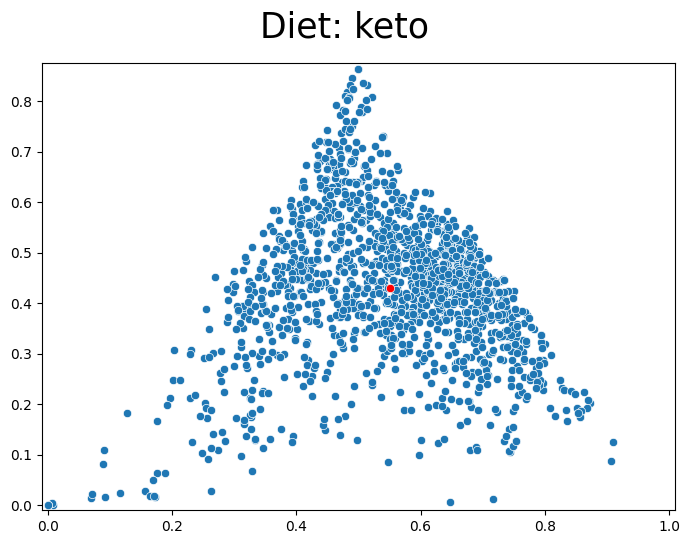

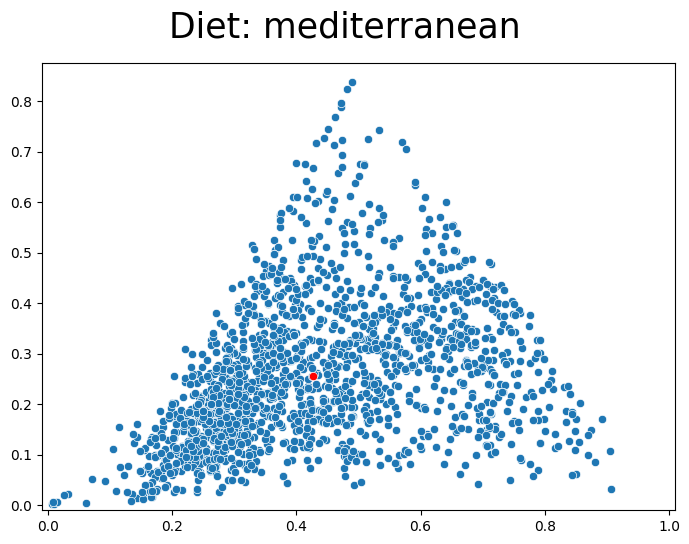

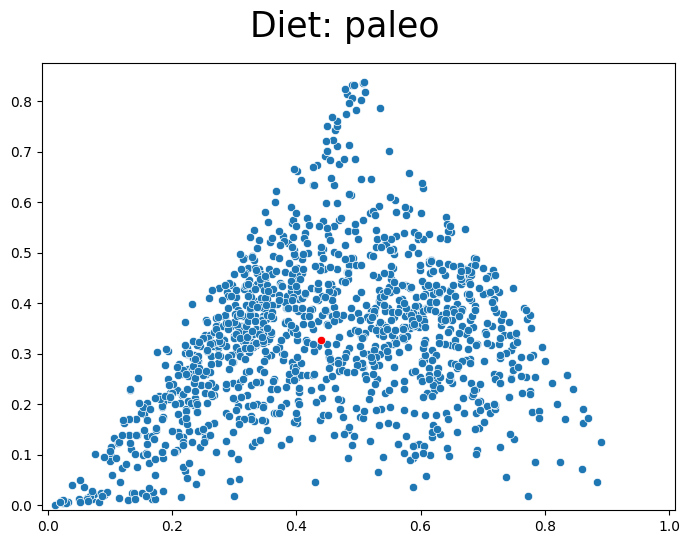

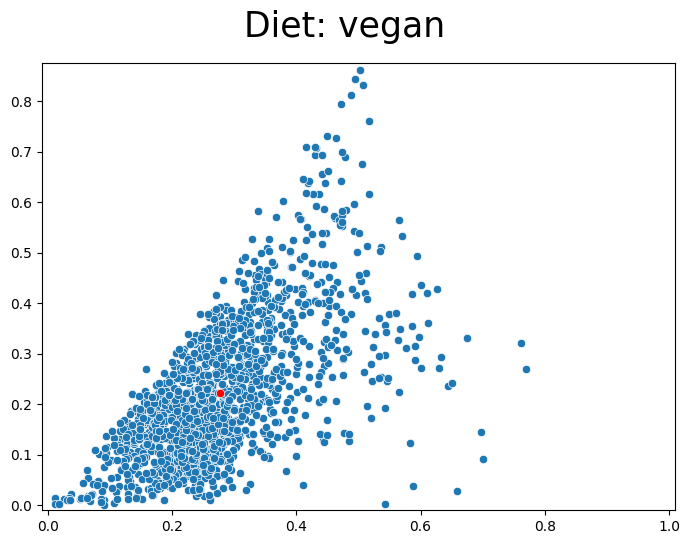

In [94]:
# Plotting of Macronutrients on Projection 

for diet in Diets:
    PlotMacronutrients2D(diet)

# References

[1] F. F. Marvasti, “Popular diets and health,” Culinary Medicine, p. 327